## CONAGUA Weather Stations: Historical Daily Data Analysis

You can access historical daily weather data from CONAGUA through the following official website:
https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/informacion-estadistica-climatologica

In [1]:
# to avoid to restart kernel when external modules are modified
%load_ext autoreload
%autoreload 2

In [2]:
from ploting import plot_max_temperatures, plot_accumulated_precipitation
from precipitation import get_accumulated_precipitation, get_data_coverage
from station import Station
from temperature import get_max_temperatures

/Users/dabetm/dev/conagua-weather-stations-stats/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
florida = Station(
    "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/zac/dia32030.txt"
)

Done metadata...
Done daily historic!


In [4]:
florida.name, florida.altitude, florida.latitude, florida.longitude

('LA FLORIDA', 1870.0, 22.68611111, -103.6025)

In [5]:
florida.daily_historic

,date,precipitation,evaporation,temperature_max,temperature_min
0,1950-01-01,0.00,2.10,20.0,-7.5
1,1950-01-02,0.00,1.50,21.0,-8.0
2,1950-01-03,0.00,2.80,22.0,-5.0
3,1950-01-04,0.00,2.90,23.5,-4.5
4,1950-01-05,0.00,2.60,21.0,-2.0
...,...,...,...,...,...
24478,2025-07-27,0.01,5.15,34.1,11.0
24479,2025-07-28,0.00,3.72,34.1,11.0
24480,2025-07-29,0.00,6.63,31.2,13.4
24481,2025-07-30,0.00,6.57,34.1,9.4


### Maximum temperatures

In [6]:
hot_weather_periods = {
    "2000": ('2000-05-01', '2000-07-31'),
    '2022': ('2013-05-01', '2013-07-31'),
    '2023': ('2023-05-01', '2023-07-31'),
    '2024': ('2024-05-01', '2024-07-31'),
    '2025': ('2025-05-01', '2025-07-31'),
}

In [7]:
hot_weather_num_days = 92
max_temp_florida_df = get_max_temperatures(florida.daily_historic, hot_weather_periods, hot_weather_num_days)
max_temp_florida_df

,2000,2022,2023,2024,2025
0,30.5,32.0,31.0,34.0,33.1
1,30.0,34.0,31.2,36.6,32.6
2,31.0,32.0,32.9,34.1,32.0
3,30.5,29.0,33.9,36.6,33.2
4,30.5,32.0,34.9,36.3,33.7
...,...,...,...,...,...
87,29.5,31.0,31.9,27.2,34.1
88,27.0,28.0,25.2,30.2,34.1
89,26.0,29.0,30.3,30.1,31.2
90,27.0,29.0,31.5,31.7,34.1


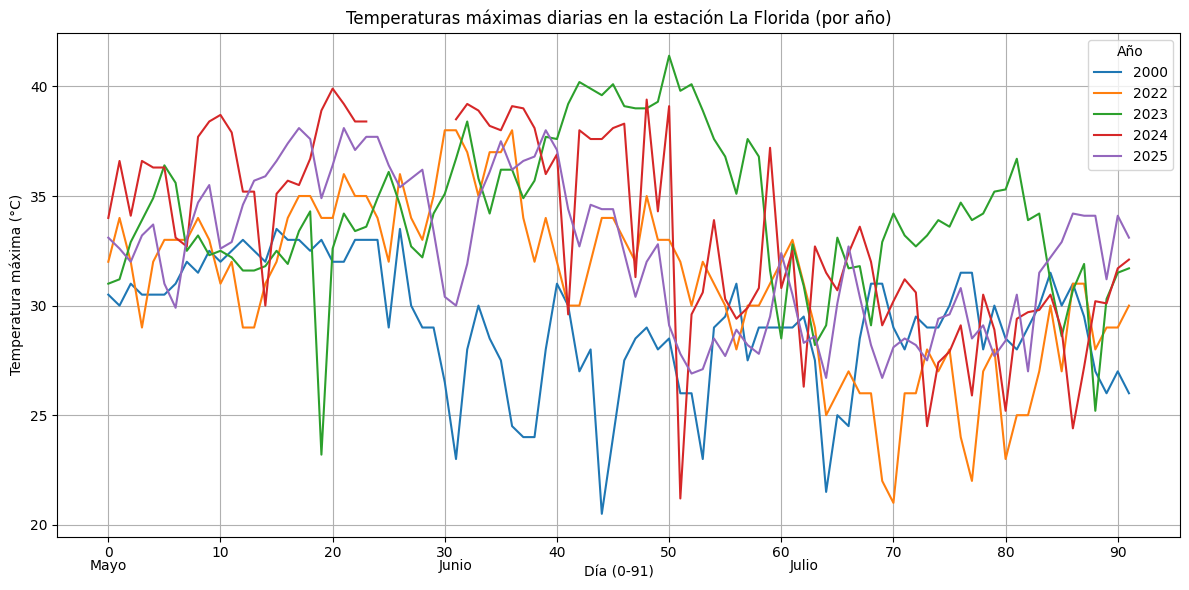

In [8]:
extra_x_markers = {
    "Mayo": 0, "Junio": 31, "Julio": 62
}
plot_max_temperatures(max_temp_florida_df, florida.name.title(), hot_weather_num_days, extra_x_markers)


In [9]:
pajaritos = Station(
    "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/zac/dia32100.txt"
)

Done metadata...
Done daily historic!


In [10]:
pajaritos.name, pajaritos.altitude, pajaritos.latitude, pajaritos.longitude

('SAN ISIDRO DE LOS GONZALEZ', 2037.0, 22.84472222, -103.3825)

In [11]:
pajaritos.daily_historic

,date,precipitation,evaporation,temperature_max,temperature_min
0,1976-06-01,0.0,NaN,NaN,NaN
1,1976-06-02,0.0,10.90,32.0,8.5
2,1976-06-03,0.0,7.00,31.0,11.0
3,1976-06-04,0.0,8.00,29.0,15.0
4,1976-06-05,0.0,4.90,29.0,10.0
...,...,...,...,...,...
16053,2025-07-27,0.0,6.63,27.5,14.0
16054,2025-07-28,0.0,6.94,27.0,16.0
16055,2025-07-29,0.0,6.20,27.0,16.0
16056,2025-07-30,0.0,5.26,28.0,11.0


In [12]:
pajaritos.name = "Presa Pajaritos"

In [13]:
max_temp_pajaritos_df = get_max_temperatures(pajaritos.daily_historic, hot_weather_periods, hot_weather_num_days)
max_temp_pajaritos_df

,2000,2022,2023,2024,2025
0,29.5,29.0,27.0,31.0,29.0
1,28.5,32.0,28.0,30.0,30.0
2,30.5,28.0,30.0,31.0,29.5
3,29.5,28.0,30.0,32.5,30.0
4,29.0,28.0,31.0,33.0,30.0
...,...,...,...,...,...
87,27.5,29.0,28.0,23.0,27.5
88,26.5,26.0,26.0,24.0,27.0
89,22.5,27.0,28.0,27.0,27.0
90,24.5,28.0,28.0,26.0,28.0


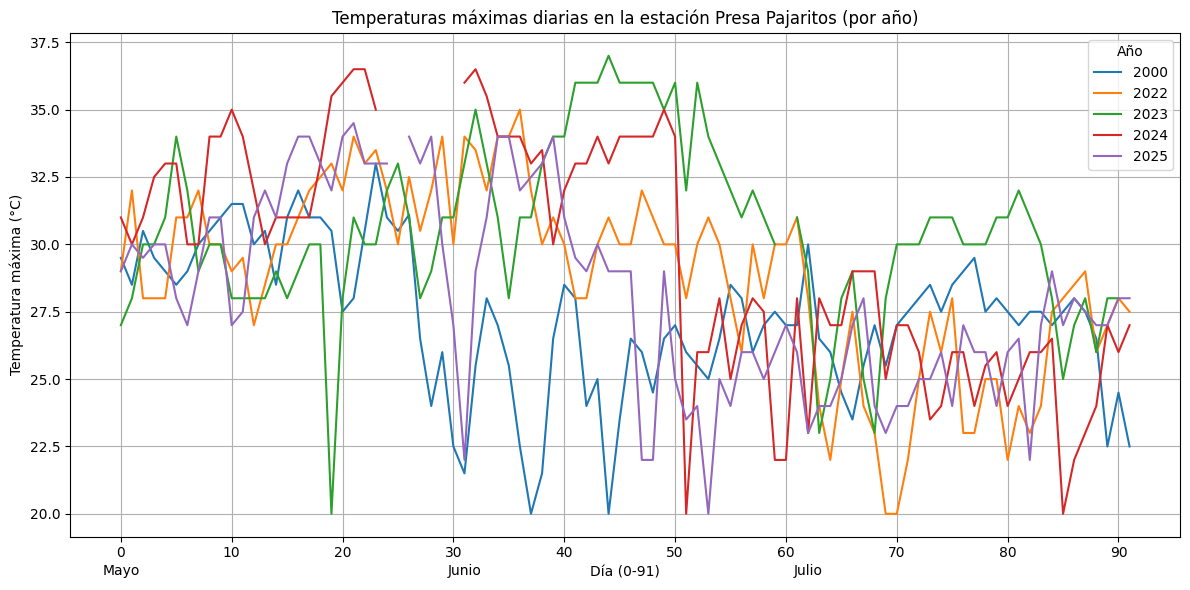

In [14]:
plot_max_temperatures(max_temp_pajaritos_df, pajaritos.name.title(), hot_weather_num_days, extra_x_markers)

### Accumulated precipitation

In [15]:
import pandas as pd

from precipitation import get_accumulated_precipitation, get_data_coverage
from ploting import plot_accumulated_precipitation

rainy_periods = {
    "years": [2000, 2021, 2022, 2024, 2025],
    #"years": list(range(2000, 2026)),
    "months": [6, 7, 8, 9],
}

In [16]:
pd.set_option('display.max_columns', None)

acc_precipitation_florida = get_accumulated_precipitation(
    florida.daily_historic, rainy_periods["years"], rainy_periods["months"]
)

print(type(acc_precipitation_florida))
acc_precipitation_florida

<class 'pandas.core.frame.DataFrame'>


year,2000,2021,2022,2024,2025
month,,,,,
Junio,54.31,149.02,63.56,71.53,122.53
Julio,63.01,164.83,176.05,149.55,107.93
Agosto,180.60,104.55,186.05,86.06,NaN
Septiembre,54.50,139.01,48.03,82.12,NaN


In [17]:
pd.reset_option('display.max_columns')

In [18]:
data_cov_florida = get_data_coverage(florida.daily_historic, rainy_periods["years"], rainy_periods["months"])
data_cov_florida

['2000: 421.2 mm, datos: 98.9%',
 '2021: 606.2 mm, datos: 93.5%',
 '2022: 512.2 mm, datos: 100.0%',
 '2024: 435.3 mm, datos: 100.0%',
 '2025: 239.5 mm, datos: 34.4%']

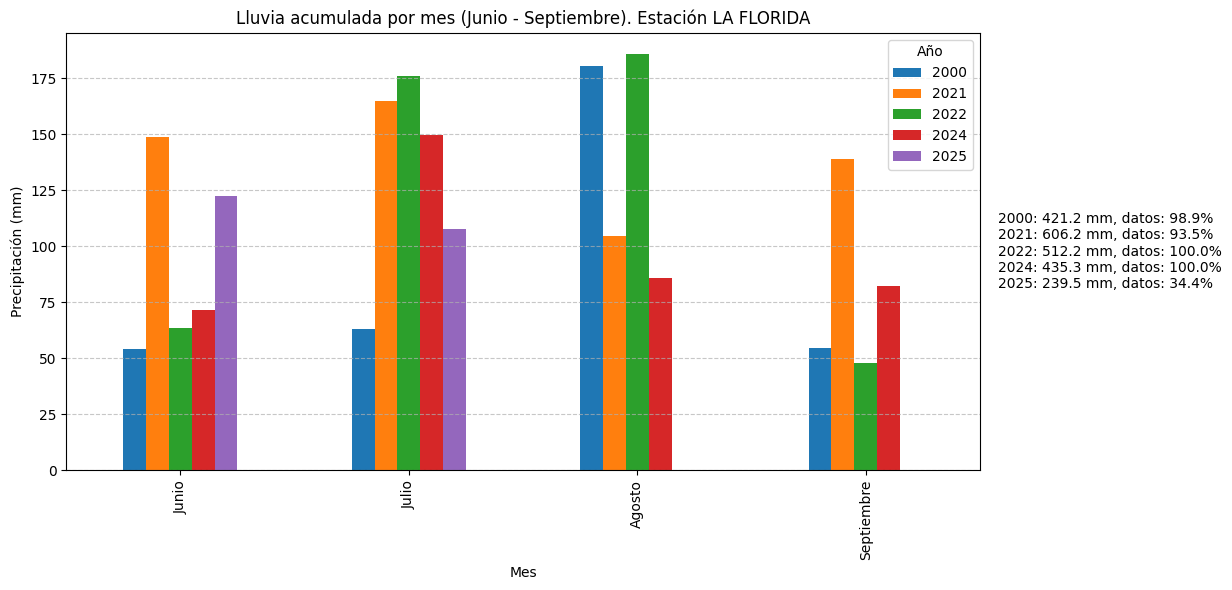

In [19]:
plot_accumulated_precipitation(
    acc_precipitation_florida,
    florida.name,
    months=rainy_periods["months"],
    additional_legend="\n".join(data_cov_florida)
)

In [20]:
acc_precipitation_pajaritos = get_accumulated_precipitation(
    pajaritos.daily_historic, rainy_periods["years"], rainy_periods["months"]
)
acc_precipitation_pajaritos

year,2000,2021,2022,2024,2025
month,,,,,
Junio,126.9,97.1,51.0,95.0,122.5
Julio,63.2,187.1,86.0,121.2,151.6
Agosto,95.3,64.5,122.7,47.9,NaN
Septiembre,70.2,234.6,92.0,61.1,NaN


In [21]:
data_cov_pajaritos = get_data_coverage(pajaritos.daily_historic, rainy_periods["years"], rainy_periods["months"])
data_cov_pajaritos

['2000: 449.0 mm, datos: 100.0%',
 '2021: 628.8 mm, datos: 100.0%',
 '2022: 370.2 mm, datos: 100.0%',
 '2024: 420.7 mm, datos: 100.0%',
 '2025: 322.8 mm, datos: 34.4%']

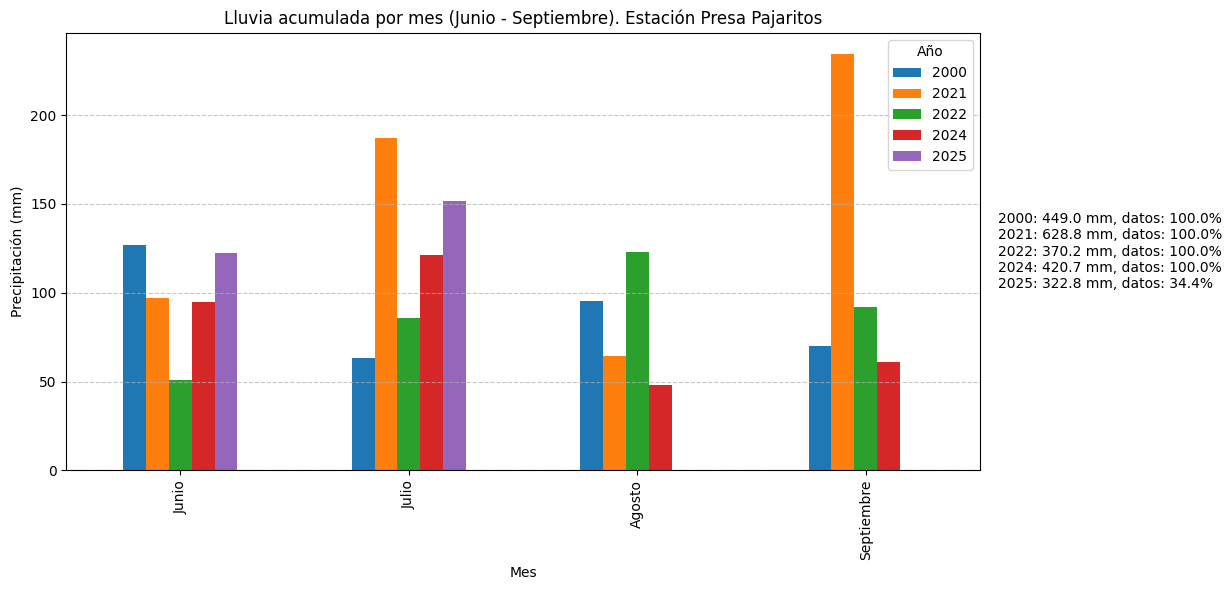

In [22]:
plot_accumulated_precipitation(
    acc_precipitation_pajaritos,
    pajaritos.name,
    months=rainy_periods["months"],
    additional_legend="\n".join(data_cov_pajaritos)
)